<a href="https://colab.research.google.com/github/afridkhan1010/skilldevelopment/blob/master/EDA_project_Airbnb_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NYC Airbnb - EDA and Visualization


* id: Unique listing ID
* name: Name of the listing
* host_id: Unique host ID
* host_name: Name of the host
* neighbourhood_group: Location
* neighbourhood: Area
* latitude: Latitude coordinates
* longitude: Longitude coordinates
* room_type: Listing type
* price: Price in dollars
* minimum_nights: Amount of nights minimum
* number_of_reviews: number of reviews
* last_review: latest review
* reviews_per_month: number of reviews per month
* calculated_host_listings_count: amount of listing per host
* availability_365: number of days when listing is available for booking

In [ ]:
#importing packages required for the  future analysis and data pre-processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#reading the dataset of Airbnb using pandas library
airbnb_df=pd.read_csv("C:/Users/Admin/Downloads/Airbnb NYC 2019.csv")

In [ ]:
#examing the first and last 5 rows of the datset
airbnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
#checking the type of each column using info() in the dataset
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#looking only for top 5 rows of the dataset to examine further
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#looking to find out first what columns have null values
#using 'sum' function will show us how many nulls are found in each column in dataset
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### Dropping the columns which are not of intrest

In [ ]:
#dropping columns that are not significant or could be unethical to use for our future data exploration and predictions

airbnb_df.drop(['id','last_review'],axis=1,inplace=True) #dropping the columns and making changes to the original dataset

In [ ]:
#examing the changes
airbnb_df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
airbnb_df.isnull().sum()

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### Treating the null Values

In [ ]:
airbnb_df.fillna({'reviews_per_month':0},inplace=True)
#filling the missing values to the 'reviews_per_month' column with  '0' since we cannot fill the reviews with any of aggregation methods


In [ ]:
airbnb_df.isnull().sum()

name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [ ]:
#airbnb_df['host_name'].dropna(axis=0).shape
#we cannot drop the rows as any of the column may have some useful data, henace dropping the 'host_name' column
airbnb_df.drop(['host_name'],axis=1,inplace=True)


In [ ]:
airbnb_df.isnull().sum()

name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [ ]:
#examine the dataset by describe method to only numerical columns
(airbnb_df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365']]
 .describe())

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
# Exclude property with listed price of 0
airbnb_df = airbnb_df.loc[airbnb_df['price'] >0 ]

In [ ]:
airbnb_df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,1.090800,7.144628,112.779498
std,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,1.597213,32.956185,131.627271
min,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Using dist plots to visualize the distribution of variable values

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

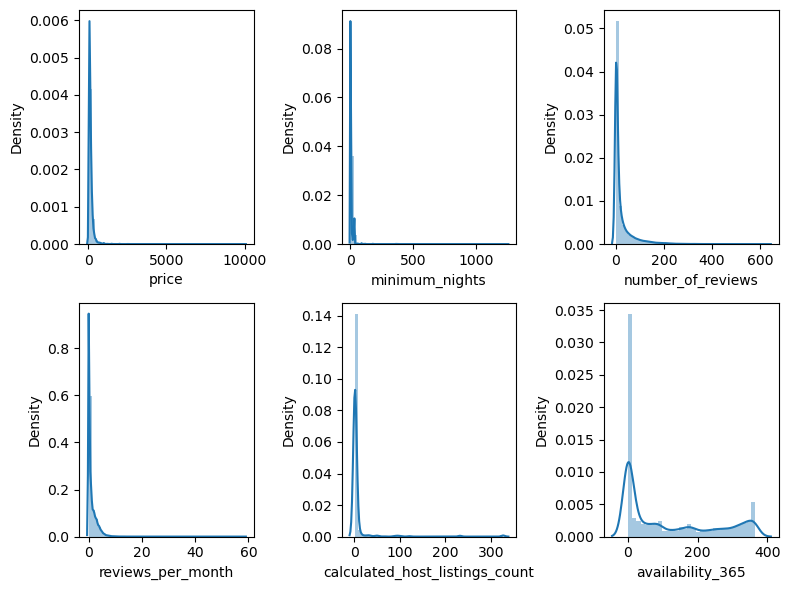

In [ ]:
from pylab import *

f, ax= plt.subplots(figsize=(8,6))
subplot(2,3,1)
sns.distplot(airbnb_df['price'])

subplot(2,3,2)
sns.distplot(airbnb_df['minimum_nights'])

subplot(2,3,3)
sns.distplot(airbnb_df['number_of_reviews'])

subplot(2,3,4)
sns.distplot(airbnb_df['reviews_per_month'])

subplot(2,3,5)
sns.distplot(airbnb_df['calculated_host_listings_count'])

subplot(2,3,6)
sns.distplot(airbnb_df['availability_365'])

plt.tight_layout() # avoid overlap of plotsplt.draw()

<AxesSubplot:ylabel='price'>

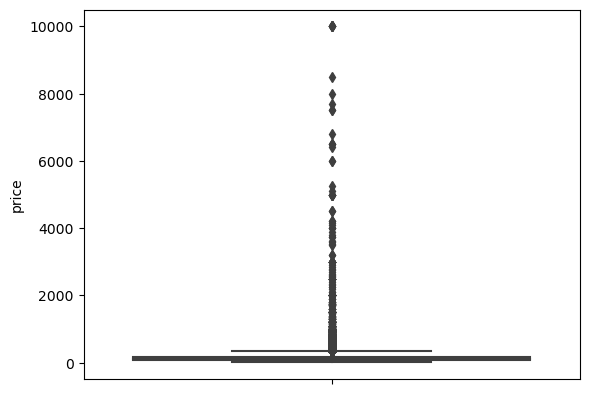

In [ ]:
#using box plot to visualize the price distribution and outliers

sns.boxplot(y='price', data=airbnb_df)

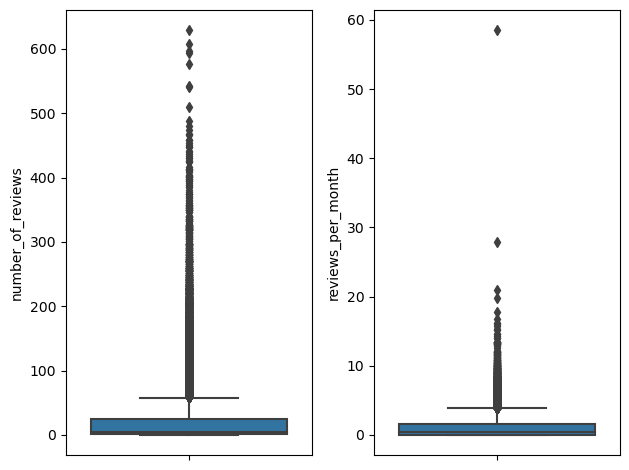

In [ ]:
f, ax=plt.subplots(4,10)
subplot(1,2,1)
sns.boxplot(y = airbnb_df['number_of_reviews'])

subplot(1,2,2)
sns.boxplot(y = airbnb_df['reviews_per_month'])

plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


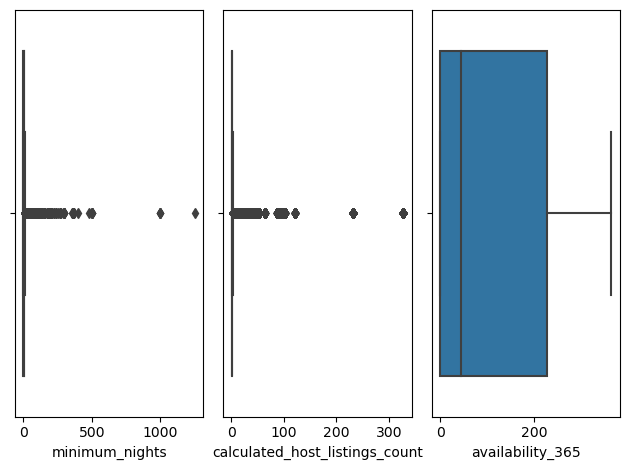

In [ ]:
f, ax=plt.subplots(6,6)
subplot(1,3,1)
sns.boxplot(airbnb_df['minimum_nights'])

subplot(1,3,2)
sns.boxplot(airbnb_df['calculated_host_listings_count'])

subplot(1,3,3)
sns.boxplot(airbnb_df['availability_365'])

plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


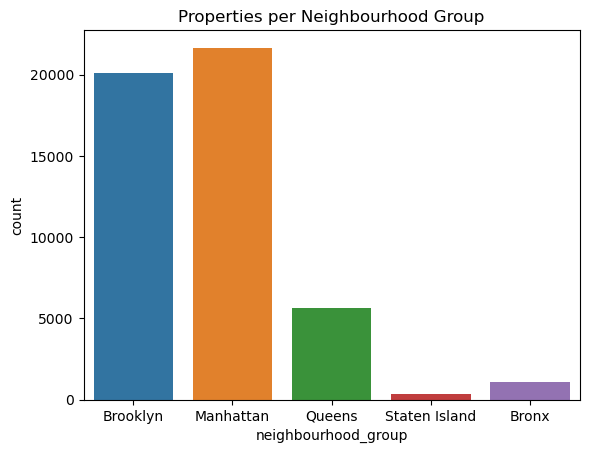

In [ ]:
#visualizing properties based on neighbourhood
title = 'Properties per Neighbourhood Group'
sns.countplot(airbnb_df['neighbourhood_group'])
plt.title(title)
plt.ioff()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


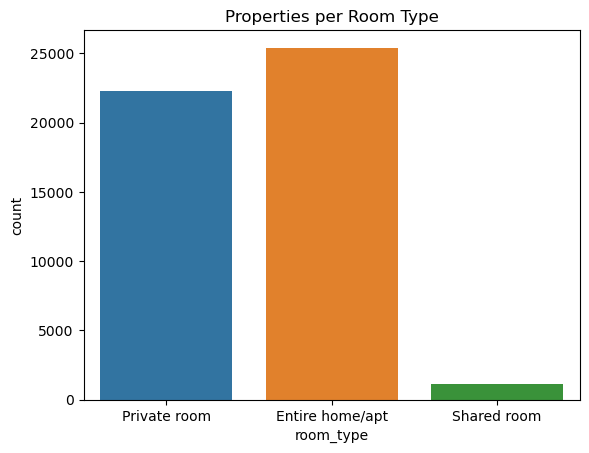

In [ ]:
#visualizing properties based on room type
title = 'Properties per Room Type'
sns.countplot(airbnb_df['room_type'])
plt.title(title)
plt.show()

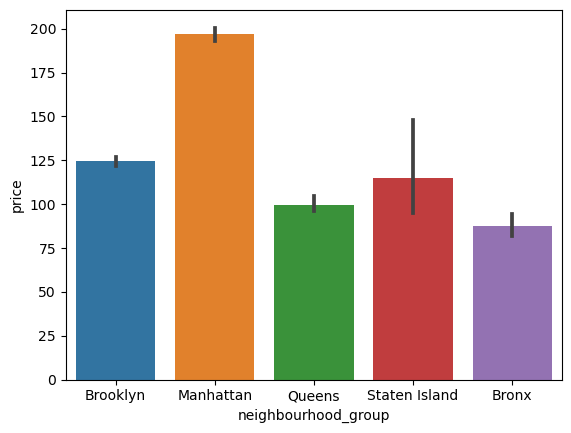

In [ ]:
#visualizing te relation between price vs location
sns.barplot(y='price',x='neighbourhood_group',data=airbnb_df)
plt.show()

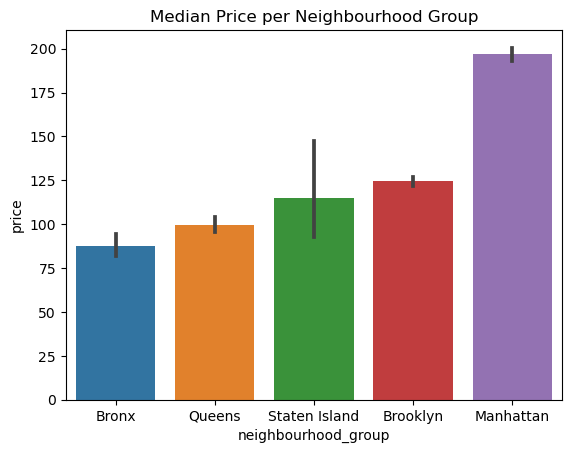

In [ ]:
title = 'Median Price per Neighbourhood Group'
result = airbnb_df.groupby(["neighbourhood_group"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='neighbourhood_group', y="price", data=airbnb_df, order=result['neighbourhood_group'])
plt.title(title)
plt.show()

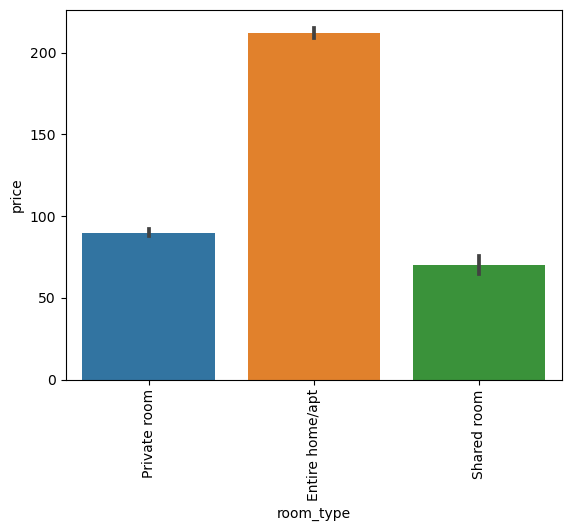

In [ ]:
#Visualizing price vs room_type
sns.barplot(y='price',x='room_type',data=airbnb_df)
plt.xticks(rotation=90)
plt.show()

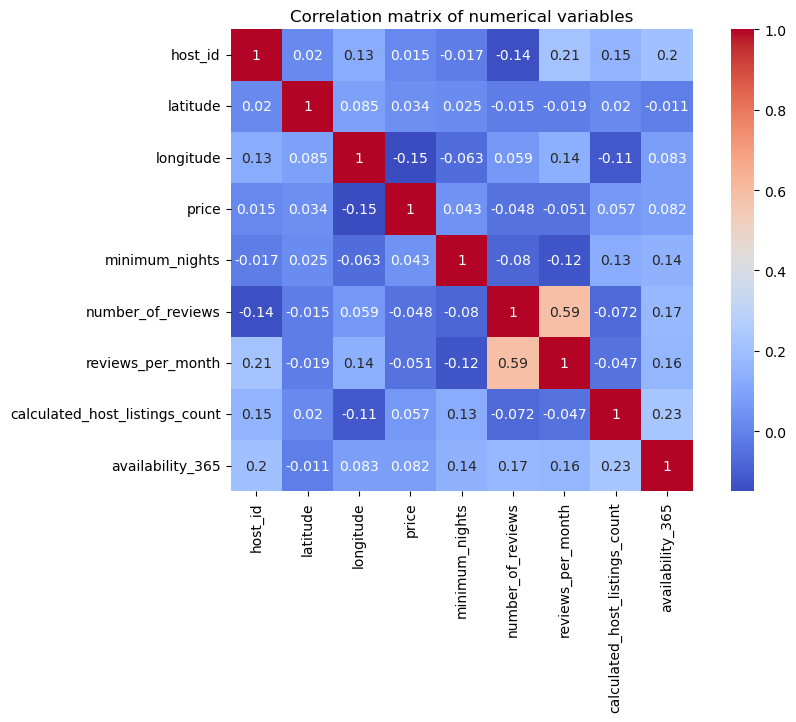

In [ ]:
#Visualizing co-relation of columns
plt.figure(figsize=(10,6))
title = 'Correlation matrix of numerical variables'
sns.heatmap(airbnb_df.corr(), square=True, cmap='coolwarm',annot=True)
plt.title(title)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


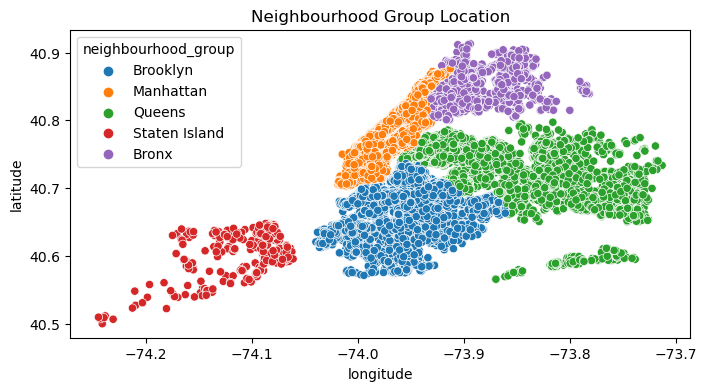

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


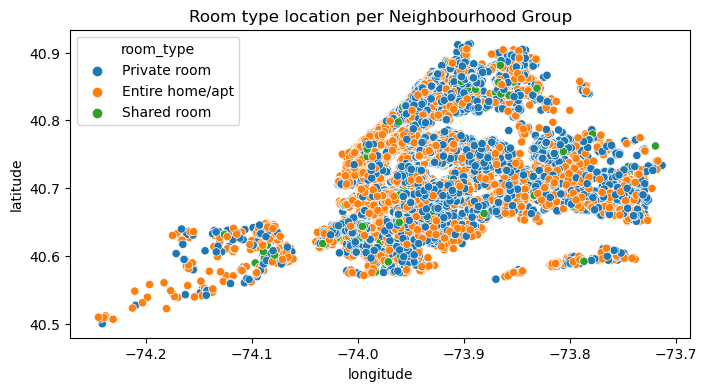

In [ ]:
#Visualizing on where the hotels are located and based on the neighbourhood
title = 'Neighbourhood Group Location'
plt.figure(figsize=(8,4))
sns.scatterplot(airbnb_df.longitude,airbnb_df.latitude,hue=airbnb_df.neighbourhood_group).set_title(title)
plt.show()

title = 'Room type location per Neighbourhood Group'
plt.figure(figsize=(8,4))
sns.scatterplot(airbnb_df.longitude,airbnb_df.latitude,hue=airbnb_df.room_type).set_title(title)
plt.show()

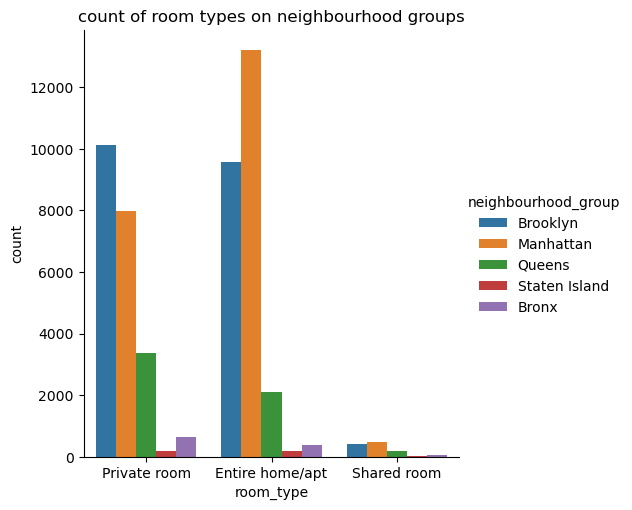

In [ ]:
title = 'count of room types on neighbourhood groups'
sns.catplot(x='room_type', kind="count", hue="neighbourhood_group", data=airbnb_df);
plt.title(title)
plt.show()

###### majority of Entire home/apt are located in Manhattan
###### majority of private rooms are located in Brooklyn

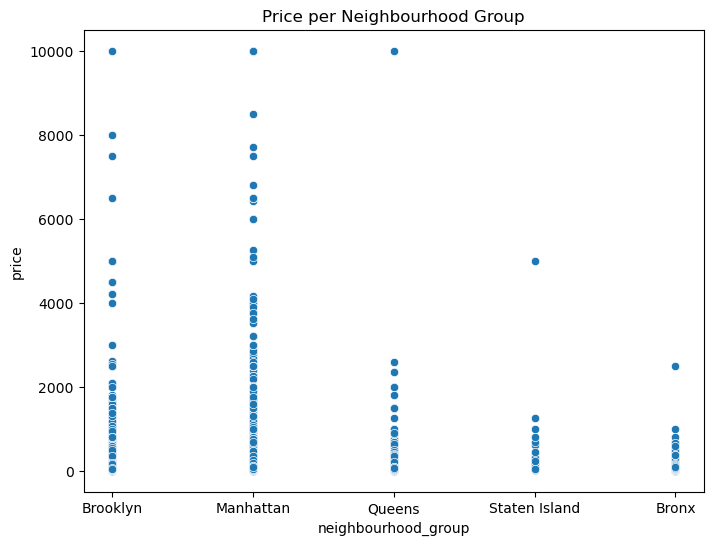

In [ ]:
x= 'neighbourhood_group'
y= 'price'
title = 'Price per Neighbourhood Group'

f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=airbnb_df)
plt.title(title)
plt.show()

In [ ]:
# price relation to the number of reviews per month for the properties under 200$

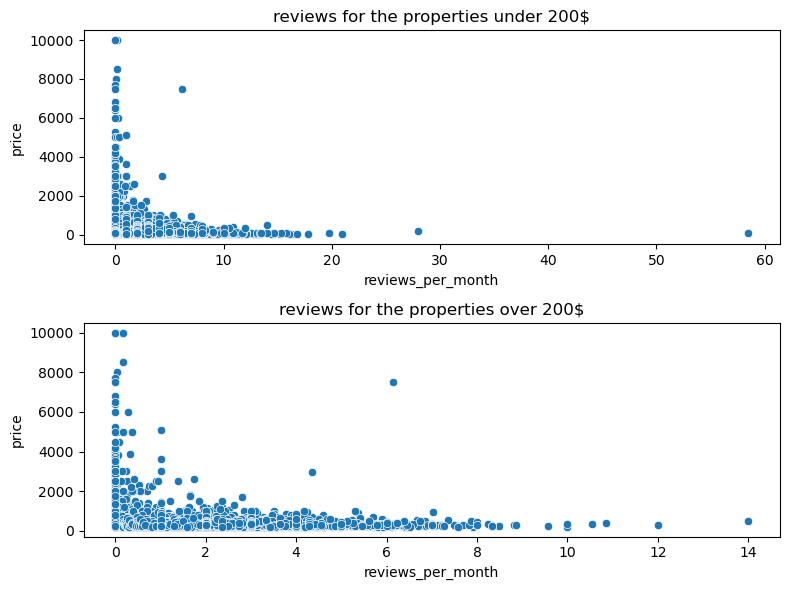

In [ ]:
filtered_data=airbnb_df.loc[(airbnb_df['price']<200)& airbnb_df['reviews_per_month']<30]
f,ax=plt.subplots(figsize=(8,6))
plt.subplot(2,1,1)
sns.scatterplot(x='reviews_per_month',y='price',data=filtered_data)
plt.title('reviews for the properties under 200$')

filtered_data2=airbnb_df.loc[(airbnb_df['price']>200)]
plt.subplot(2,1,2)
sns.scatterplot(x='reviews_per_month',y='price',data=filtered_data2)
plt.title('reviews for the properties over 200$')
plt.tight_layout()
plt.show()


In [1]:
#Thank you